# Homework Assignment 2
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

## Dataset Collecting

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [7]:
import requests  
from bs4 import BeautifulSoup

dic =  dict()

def get_titles_and_votes_num(u):
  html = requests.get(u).content.decode('utf-8')
  soup = BeautifulSoup(html, 'html.parser')
  titles = soup.findAll('tr', attrs={'class': 'athing'})
  votes = soup.findAll('span', attrs={'class': 'score'})
  for t in titles:
    title = t.find('a', attrs={"class":"titlelink"}).contents[0]
    votes_id = t.attrs['id']
    votes_num = soup.find('span', attrs={"id":f"score_{votes_id}"})
    votes_num = 0 if votes_num is None else int((votes_num.contents[0]).split(" ")[0])

    dic[title] = votes_num
  return dic
    

get_titles_and_votes_num("https://news.ycombinator.com/")

{'A Foolish Consistency: Consul at Fly.io': 85,
 'Claymorphism: Will It Stick Around? UI Trends': 12,
 'Clerky is hiring senior software engineers (full-stack, Rails) everywhere': 0,
 'Dagger: a new way to build CI/CD pipelines': 338,
 'Developers spend most of their time figuring the system out': 559,
 'Do revolutionary new Sudoku techniques teach about real-world problem solving?': 59,
 'Downpour: A game making tool for phones': 140,
 'Generics can make your Go code slower': 401,
 'Guidance by Railway Tracks (2016) [video]': 10,
 'Hard to work with': 205,
 "How does Firefox's Reader View work?": 47,
 'How is portable AM radio possible?': 157,
 'Idol Words': 107,
 'Johns Hopkins Beast': 136,
 'LIDL cloud alternative to AWS seems down one day after launch': 4,
 'Lapsus$ and SolarWinds hackers both use the same old trick to bypass MFA': 199,
 'Mastodon 3.5': 248,
 'Math Poetry (2015)': 17,
 'Meta suspends Netherlands data center due to political pushback': 135,
 'Paperless-NGX': 48,
 'P

**Question 2**:  Write a function that collects data on four James Bond movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [8]:
! pip install tmdbv3api

In [10]:
from tmdbv3api import TMDb, Movie
tmdb = TMDb()
tmdb.api_key = 'cbbc35ca105c6b2e959da88bc0530a3c'
tmdb.language = 'en'

def get_James_Bond_data():
  movie_num = 4
  movie = Movie()
  res = movie.search('James Bond')
  for movie in res[:movie_num]:
    print("-"*20)
    print("Movie Title: {}".format(movie.title))
    print("Movie Overview: {}".format(movie.overview))
    print("Movie Vote Average: {}".format(movie.vote_average))
    
get_James_Bond_data()

--------------------
Movie Title: Being James Bond
Movie Overview: Daniel Craig candidly reflects on his 15 year adventure as James Bond. Including never-before-seen archival footage from Casino Royale to the upcoming 25th film No Time To Die, Craig shares his personal memories in conversation with 007 producers, Michael G Wilson and Barbara Broccoli.
Movie Vote Average: 7.9
--------------------
Movie Title: The James Bond Story
Movie Overview: Bond... James Bond! Perhaps the greatest fictional cinema icon ever. He first appeared on the big screen in 1962 in Dr. No and has remained the most powerful action hero ever since. The secret to his success is his adaptability. No matter what tight spots he finds himself in, he always appears to be suave, sophisticated and cool. This is the full story -- from the creation of the character, the men who played him, all the toys, and all the women. Everything you wanted to know about James Bond... and more.
Movie Vote Average: 6.5
----------------

## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [1]:
# which question to answer - put your ID number and run the code 
your_id  = "204591424"
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 3 and 4


In [11]:
! pip install -q kaggle

In [14]:
!mkdir /root/.kaggle/
!mkdir ./datasets
import json
import os

api_token = {"username":"danasror","key":"59fb8a77e12151330ce4316bc0bb9c5e"}
# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

# download and unzip dataset
!kaggle datasets list -s kickstarter-projects
!kaggle datasets download kemical/kickstarter-projects -p ./datasets/kickstarter-projects/
!unzip ./datasets/kickstarter-projects/*.zip  -d ./datasets/kickstarter-projects/

import pandas as pd
CSV_PATH = "./datasets/kickstarter-projects/ks-projects-201801.csv"
df = pd.read_csv(CSV_PATH)

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
ref                                                                         title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------------  --------------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
datasets/kemical/kickstarter-projects                                       Kickstarter Projects                                37MB  2018-02-08 09:02:30          60955       1492  0.7941176        
datasets/codename007/funding-successful-projects                            Funding Successful Projects on Kickstarter          20MB  2017-06-20 17:37:38           3148        115  0.88235295       
datasets/toshimelonhead/400000-kickstarter-projects                         400,000 Kickstarter Projects                          0B  2019-07-2

**Question 1:** On average which project category received the lowest number of backers? (15 pt) 

**Question 2:** On average which project category received the lowest pledged USD? (15 pt)

**Question 3:** In which month is there the lowest number of projects? (15 pt)

In [22]:
df.head()
# adding launching_month column by slicing launching-date column
df['launching_month'] = df['launched'].str[5:7]

# use group by to get groups of month
groups = df.groupby('launching_month')

print(f"thr month with the lowest number of projects is: {groups.size().argmin()+1}")

thr month with the lowest number of projects is: 12


**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

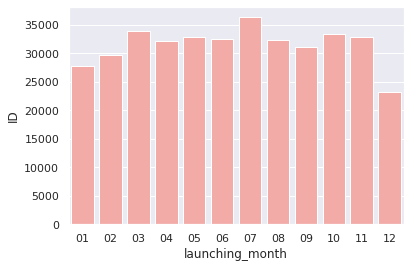

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

sns.set_theme(style="darkgrid")
sns.set_color_codes("pastel")

count=groups.count()
fig = plt.figure()
sns.barplot(x=count.index, y="ID", data=count, color="r")
plt.ylabel = "Count"

## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  Pandas, please answer the following questions:

**Question 1:** Write code which calculate the top-10 most friendly characters, i.e., characters with the 
    highest number of friends. Please use _hero_network.csv_ file (15pt). 
    
**Note:** Not all the links in this dataset are symmetric.

In [28]:
# download and unzip dataset
!kaggle datasets list -s Marvel Universe Social Network 
!kaggle datasets download csanhueza/the-marvel-universe-social-network -p ./datasets/marvel/
!unzip ./datasets/marvel/*.zip  -d ./datasets/marvel/

CSV_PATH = "./datasets/marvel/hero-network.csv"
df = pd.read_csv(CSV_PATH)

#  Not all the links in this dataset are symmetric, we need to creat one big df with all links:
copy_df = df.copy()
copy_df[['hero1','hero2']] = copy_df[['hero2','hero1']]
df = pd.concat([df, copy_df])

groups = df.groupby("hero1")
print("top-10 most friendly characters:")
friends_count = groups.count().sort_values("hero2", ascending=0)
friends_count.head(10)



usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: unrecognized arguments: Universe Social Network
the-marvel-universe-social-network.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/marvel/the-marvel-universe-social-network.zip
replace ./datasets/marvel/edges.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/marvel/edges.csv  
replace ./datasets/marvel/hero-network.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/marvel/hero-network.csv  
replace ./datasets/marvel/nodes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/marvel/nodes.csv  
top-10 most friendly characters:


,hero2
hero1,
CAPTAIN AMERICA,16499
SPIDER-MAN/PETER PAR,13717
IRON MAN/TONY STARK,11817
THOR/DR. DONALD BLAK,11427
THING/BENJAMIN J. GR,10681
WOLVERINE/LOGAN,10353
HUMAN TORCH/JOHNNY S,10237
SCARLET WITCH/WANDA,9911
MR. FANTASTIC/REED R,9775


**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

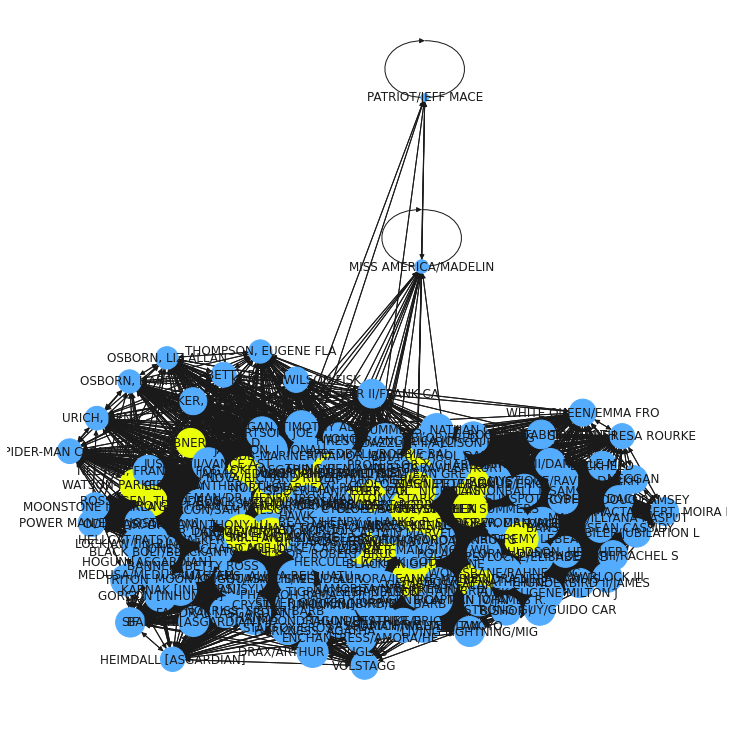

In [31]:
NODES_CSV_PATH = "./datasets/marvel/nodes.csv"
nodes_df = pd.read_csv(NODES_CSV_PATH)
nodes_df

verticies = set(friends_count.head(150)['hero2'].index)
links = []
i=0
for hero1, hero1_df in groups:
  if hero1 in verticies: 
    for hero2 in hero1_df["hero2"]:
      if hero2 in verticies:
        links.append((hero1,hero2))
        links.append((hero2,hero1))

import networkx as nx
%matplotlib inline

graph = nx.DiGraph()
graph.add_edges_from(set(links))
nx.info(graph)

import numpy as np
types = list(np.unique(nodes_df["type"].values))

types_dic = {'comic': "#ff4ae1", 'hero':"#54acff", "no_type": "#eaff08"}
types_dic

d = dict(graph.degree)

node_colors = []
# add node color by type
for node in graph.nodes(data=True):
  type_list = nodes_df[nodes_df['node']==node[0]]["type"].values
  node_type = "no_type" if len(type_list)==0 else type_list[0]
  node_colors.append(types_dic.get(node_type))

import matplotlib.pyplot as plt
plt.figure(3,figsize=(10,10))
nx.draw(graph, nodelist=list(d.keys()), node_size=[v*5  for v in d.values()], with_labels=True, node_color=node_colors)

**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) (10pt)